In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Unsupervised learning-k-means model.

In [2]:
country=pd.read_csv('E:/DSS/gilthub projects/09-Country data/countries.csv')

In [3]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country.shape

(167, 10)

In [7]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# convert exports, health and imports percentage to actual value
country["exports"]=country["exports"]*country["gdpp"]/100
country["health"]=country["health"]*country["gdpp"]/100
country["imports"]=country["imports"]*country["gdpp"]/100

In [9]:
country.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220
7,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840


In [10]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
country_num =country.drop("country",axis=1)

In [12]:
# pca is dimensionality reducton OR remove redundency
from sklearn.preprocessing import StandardScaler

In [13]:
scaler=StandardScaler()

In [14]:
dat=scaler.fit_transform(country_num)

In [15]:
# pca is applied for data redundencies and important data directions
from sklearn.decomposition import PCA

In [16]:
pca=PCA(svd_solver="randomized",random_state=42)

In [17]:
pca.fit(dat)

PCA(random_state=42, svd_solver='randomized')

In [18]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [19]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

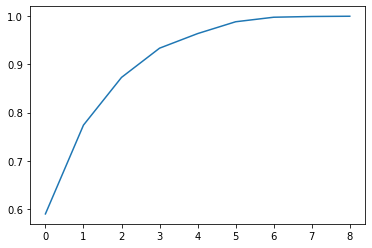

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [21]:
from sklearn.decomposition import IncrementalPCA

In [22]:
pca_final=PCA(n_components=3)

In [23]:
dat_train_pca=pca_final.fit_transform(dat)

In [24]:
dat_train_pca.shape

(167, 3)

In [25]:
pc=np.transpose(dat_train_pca)
pc

array([[-2.63557499e+00, -2.42055643e-02, -4.59557398e-01,
        -2.72263028e+00,  6.48597043e-01,  3.54221548e-02,
        -3.34554724e-01,  3.18152480e+00,  3.81685715e+00,
        -4.67994708e-01,  1.49896170e+00,  1.47088772e+00,
        -1.01516655e+00,  8.44165717e-01, -1.50192243e-02,
         3.96165209e+00, -4.03885263e-01, -2.36396201e+00,
        -7.16047998e-01, -1.01877707e+00,  2.50743177e-01,
        -1.12948907e+00,  1.65169993e-01,  2.69707911e+00,
         2.79292646e-01, -2.75148004e+00, -2.76243995e+00,
        -1.17965396e+00, -2.43892330e+00,  3.39523415e+00,
        -5.24475038e-01, -3.23694559e+00, -3.18539522e+00,
         6.90650603e-01, -1.30696482e-01, -1.55448767e-02,
        -1.94913029e+00, -3.11493019e+00, -2.04734314e+00,
         4.29282147e-01, -2.57219502e+00,  8.45147825e-01,
         2.31333607e+00,  1.67399330e+00,  4.37790595e+00,
        -3.68925556e-01, -3.04457221e-01, -8.37748859e-01,
        -3.38219520e-01, -1.05254165e+00, -1.94833895e+0

In [26]:
pc.shape

(3, 167)

In [27]:
country_names=list(country["country"])

In [28]:
dat_pca=pd.DataFrame({"country":country_names,"pc1":pc[0],"pc2":pc[1],"pc3":pc[2]})
dat_pca.head()

,country,pc1,pc2,pc3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Albania,-0.024206,-1.429892,-0.014123
2,Algeria,-0.459557,-0.675495,0.959355
3,Angola,-2.722630,2.172332,0.600215
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430


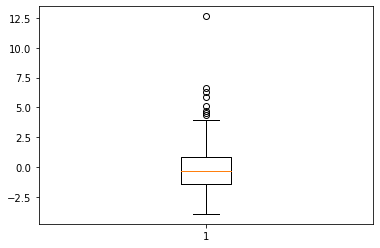

In [29]:
plt.boxplot(dat_pca.pc1)
Q1=dat_pca.pc1.quantile(0.05)
Q3=dat_pca.pc1.quantile(0.95)
IQR=Q3-Q1
dat_pca=dat_pca[(dat_pca.pc1>=Q1) & (dat_pca.pc1<=Q3)]

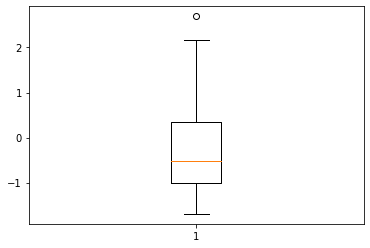

In [30]:
# Remove outliers apply confedence interval
plt.boxplot(dat_pca.pc2)
Q1=dat_pca.pc2.quantile(0.05)
Q3=dat_pca.pc2.quantile(0.95)
IQR=Q3-Q1
dat_pca=dat_pca[(dat_pca.pc2 >=Q1) & (dat_pca.pc2<=Q3)]

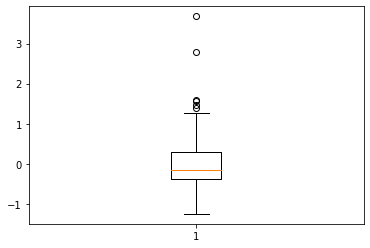

In [31]:
plt.boxplot(dat_pca.pc3)
Q1=dat_pca.pc3.quantile(0.05)
Q3=dat_pca.pc3.quantile(0.95)
IQR=Q3-Q1
dat_pca=dat_pca[(dat_pca.pc3>=Q1) & (dat_pca.pc3<=Q3)]

In [32]:
dat_pca.shape

(119, 4)

In [33]:
dat_pca3=dat_pca
dat_pca3_1=scaler.fit_transform(dat_pca3.drop("country",axis=1))

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
from sklearn.cluster import KMeans

In [36]:
sse=[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k).fit(dat_pca3_1)
    sse.append([k,silhouette_score(dat_pca3_1,kmeans.labels_)])

In [37]:
sse

[[2, 0.36409699931656436],
 [3, 0.35667829649499305],
 [4, 0.3838795488784749],
 [5, 0.39168051358914474],
 [6, 0.3678929714210497],
 [7, 0.35690129769878065],
 [8, 0.37397495846449985],
 [9, 0.36989551611179156]]

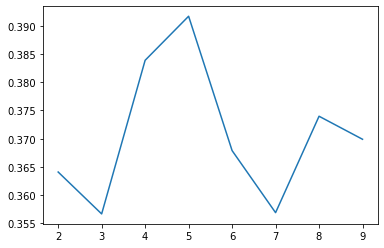

In [38]:
plt.plot(pd.DataFrame(sse)[0],pd.DataFrame(sse)[1]);

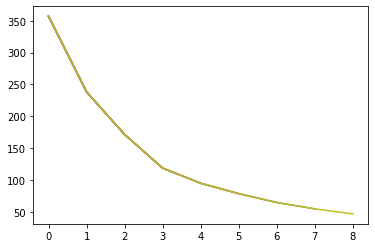

In [39]:
ssd=[]
for num_clusters in list(range(1,10)):
    model_clus=KMeans(n_clusters=num_clusters,max_iter=50)
    model_clus.fit(dat_pca3_1)
    ssd.append(model_clus.inertia_)
    plt.plot(ssd)

In [40]:
model_clus5=KMeans(n_clusters=5,max_iter=50)
model_clus5

KMeans(max_iter=50, n_clusters=5)

In [41]:
model_clus5.fit(dat_pca3_1)

KMeans(max_iter=50, n_clusters=5)

In [42]:
dat_pca3

,country,pc1,pc2,pc3
0,Afghanistan,-2.635575,1.472267,-0.549489
2,Algeria,-0.459557,-0.675495,0.959355
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430
6,Armenia,-0.334555,-1.271889,0.190564
7,Australia,3.181525,-0.262485,-0.130870
...,...,...,...,...
160,Uruguay,0.454814,-1.098889,0.045829
161,Uzbekistan,-1.031922,-0.561378,0.763442
162,Vanuatu,-1.175210,-0.275652,-0.667131
164,Vietnam,-0.594449,-1.076335,0.528875


In [43]:
dat4=dat_pca3
dat4

,country,pc1,pc2,pc3
0,Afghanistan,-2.635575,1.472267,-0.549489
2,Algeria,-0.459557,-0.675495,0.959355
4,Antigua and Barbuda,0.648597,-1.023437,-0.257430
6,Armenia,-0.334555,-1.271889,0.190564
7,Australia,3.181525,-0.262485,-0.130870
...,...,...,...,...
160,Uruguay,0.454814,-1.098889,0.045829
161,Uzbekistan,-1.031922,-0.561378,0.763442
162,Vanuatu,-1.175210,-0.275652,-0.667131
164,Vietnam,-0.594449,-1.076335,0.528875


In [44]:
dat4.index=pd.RangeIndex(len(dat4.index))

In [45]:
dat4

,country,pc1,pc2,pc3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Algeria,-0.459557,-0.675495,0.959355
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430
3,Armenia,-0.334555,-1.271889,0.190564
4,Australia,3.181525,-0.262485,-0.130870
...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829
115,Uzbekistan,-1.031922,-0.561378,0.763442
116,Vanuatu,-1.175210,-0.275652,-0.667131
117,Vietnam,-0.594449,-1.076335,0.528875


In [46]:
dat_km=pd.concat([dat4,pd.Series(model_clus5.labels_)],axis=1)

In [47]:
dat_km.columns=["country","pc1","pc2","pc3","ClusterID"]

In [48]:
dat_km

,country,pc1,pc2,pc3,ClusterID
0,Afghanistan,-2.635575,1.472267,-0.549489,0
1,Algeria,-0.459557,-0.675495,0.959355,2
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,3
3,Armenia,-0.334555,-1.271889,0.190564,3
4,Australia,3.181525,-0.262485,-0.130870,1
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,3
115,Uzbekistan,-1.031922,-0.561378,0.763442,2
116,Vanuatu,-1.175210,-0.275652,-0.667131,0
117,Vietnam,-0.594449,-1.076335,0.528875,2


In [49]:
dat_km["ClusterID"].value_counts()

3    51
1    24
0    19
2    18
4     7
Name: ClusterID, dtype: int64

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

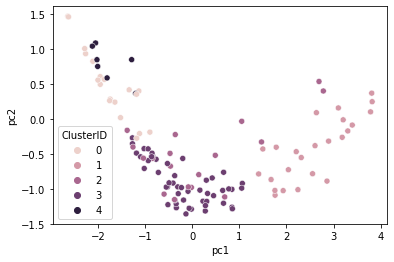

In [50]:
sb.scatterplot(x="pc1",y="pc2",hue="ClusterID",data=dat_km)

<AxesSubplot:xlabel='pc2', ylabel='pc3'>

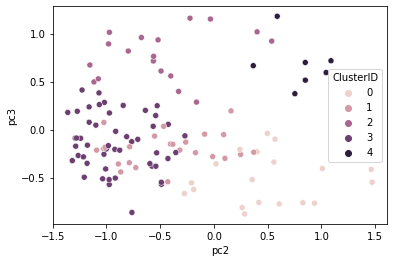

In [51]:
sb.scatterplot(x="pc2",y="pc3",hue="ClusterID",data=dat_km)

<AxesSubplot:xlabel='pc3', ylabel='pc1'>

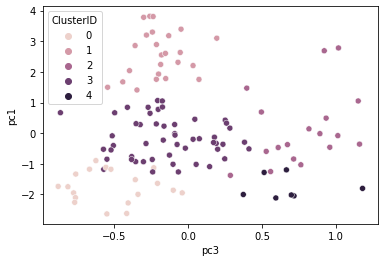

In [52]:
sb.scatterplot(x="pc3",y="pc1",hue="ClusterID",data=dat_km)

In [53]:
dat_km

,country,pc1,pc2,pc3,ClusterID
0,Afghanistan,-2.635575,1.472267,-0.549489,0
1,Algeria,-0.459557,-0.675495,0.959355,2
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,3
3,Armenia,-0.334555,-1.271889,0.190564,3
4,Australia,3.181525,-0.262485,-0.130870,1
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,3
115,Uzbekistan,-1.031922,-0.561378,0.763442,2
116,Vanuatu,-1.175210,-0.275652,-0.667131,0
117,Vietnam,-0.594449,-1.076335,0.528875,2


In [54]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [55]:
dat5=pd.merge(country,dat_km,on="country")

In [56]:
dat5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pc1,pc2,pc3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,2
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,3
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.334555,-1.271889,0.190564,3
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.181525,-0.262485,-0.130870,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,0.454814,-1.098889,0.045829,3
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,-1.031922,-0.561378,0.763442,2
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175210,-0.275652,-0.667131,0
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.594449,-1.076335,0.528875,2


In [57]:
dat6=dat5.drop(["pc1","pc2","pc3"], axis=1)

In [58]:
dat6

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,3
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,3
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,1
...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,3
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,2
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,2


# Cluster wise details

In [59]:
dat6[dat6["ClusterID"]==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,45.9325,324.912,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,50.9580,562.020,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
73,"Micronesia, Fed. Sts.",40.0,672.1000,406.1200,2316.600,3340,3.80,65.4,3.46,2860,0


In [60]:
dat6[dat6["ClusterID"]==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
5,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
7,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,1
19,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
27,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,1
28,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,1
36,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
37,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
41,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
43,Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900,1


In [61]:
dat6[dat6["ClusterID"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
6,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.80,69.1,1.92,5840,2
8,Bahrain,8.6,14386.5000,1028.7900,10536.300,41100,7.44,76.0,2.16,20700,2
11,Belarus,5.5,3099.4200,338.2830,3889.350,16200,15.10,70.4,1.49,6030,2
21,Chile,8.7,4863.3000,1026.8400,4037.700,19400,8.96,79.1,1.88,12900,2
50,Indonesia,33.3,755.7300,81.1710,696.640,8430,15.30,69.9,2.48,3110,2
51,Iran,19.3,1593.3200,365.6800,1266.820,17400,15.90,74.5,1.76,6530,2
58,Kazakhstan,21.5,4008.9400,389.1030,2711.930,20100,19.50,68.4,2.60,9070,2
60,Kuwait,10.8,25679.5000,1012.5500,11704.000,75200,11.20,78.2,2.21,38500,2
65,Libya,16.6,7937.6000,469.4800,5094.100,29600,14.20,76.1,2.41,12100,2


In [62]:
dat6["ClusterID"].value_counts()

3    51
1    24
0    19
2    18
4     7
Name: ClusterID, dtype: int64

In [63]:
dat6[dat6["ClusterID"]==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200,3
3,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220,3
9,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758,3
10,Barbados,14.2,6320.00000,1275.2000,7792.000000,15300,0.321,76.7,1.78,16000,3
12,Belize,18.8,2525.88000,225.6800,2495.500000,7880,1.140,71.4,2.71,4340,3
13,Bhutan,42.7,926.50000,113.3600,1541.260000,6420,5.990,72.1,2.38,2180,3
14,Bolivia,46.6,815.76000,95.8320,679.140000,5410,8.780,71.6,3.20,1980,3
16,Brazil,19.8,1198.40000,1009.1200,1321.600000,14500,8.410,74.2,1.80,11200,3
17,Bulgaria,10.8,3433.68000,469.9080,3625.200000,15300,1.110,73.9,1.57,6840,3
18,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786,3


In [64]:
dat6[dat6["ClusterID"]==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,"Congo, Rep.",63.9,2331.74,67.404,1498.78,5190,20.7,60.4,4.95,2740,4
38,Gabon,63.7,5048.75,306.250,1653.75,15400,16.6,62.9,4.08,8750,4
42,Ghana,74.7,386.45,68.382,601.29,3060,16.6,62.2,4.27,1310,4
52,Iraq,36.9,1773.00,378.450,1534.50,12700,16.6,67.2,4.56,4500,4
71,Mauritania,97.4,608.40,52.920,734.40,3320,18.9,68.2,4.98,1200,4
100,Sudan,76.7,291.56,93.536,254.56,3370,19.6,66.3,4.88,1480,4
118,Yemen,56.3,393.00,67.858,450.64,4480,23.6,67.5,4.67,1310,4


In [65]:
dat6[dat6["ClusterID"]==0]["country"].unique()

array(['Afghanistan', 'Botswana', 'Comoros', 'Eritrea', 'Gambia', 'Kenya',
       'Lao', 'Liberia', 'Madagascar', 'Micronesia, Fed. Sts.', 'Namibia',
       'Pakistan', 'Rwanda', 'Solomon Islands', 'South Africa',
       'Tanzania', 'Turkmenistan', 'Uganda', 'Vanuatu'], dtype=object)

In [66]:
dat6[dat6["ClusterID"]==1]["country"].unique()

array(['Australia', 'Austria', 'Bahamas', 'Canada', 'Cyprus',
       'Czech Republic', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Malta', 'New Zealand',
       'Portugal', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'], dtype=object)

In [67]:
dat6[dat6["ClusterID"]==2]["country"].unique()

array(['Algeria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Chile',
       'Indonesia', 'Iran', 'Kazakhstan', 'Kuwait', 'Libya', 'Nepal',
       'Oman', 'Russia', 'Tajikistan', 'Ukraine', 'United Arab Emirates',
       'Uzbekistan', 'Vietnam'], dtype=object)

In [68]:
dat6[dat6["ClusterID"]==3]["country"].unique()

array(['Antigua and Barbuda', 'Armenia', 'Bangladesh', 'Barbados',
       'Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'China', 'Colombia', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Jamaica',
       'Jordan', 'Kyrgyz Republic', 'Latvia', 'Lithuania', 'Malaysia',
       'Maldives', 'Mauritius', 'Moldova', 'Morocco', 'Myanmar', 'Panama',
       'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Samoa',
       'Seychelles', 'St. Vincent and the Grenadines', 'Suriname',
       'Tonga', 'Tunisia', 'Turkey', 'Uruguay'], dtype=object)

In [69]:
dat6[dat6["ClusterID"]==4]["country"].unique()

array(['Congo, Rep.', 'Gabon', 'Ghana', 'Iraq', 'Mauritania', 'Sudan',
       'Yemen'], dtype=object)

In [70]:
from scipy.cluster.hierarchy import linkage

In [71]:
from scipy.cluster.hierarchy import dendrogram

In [72]:
from scipy.cluster.hierarchy import cut_tree

In [73]:
merging=linkage(dat_pca3_1,method="single",metric="euclidean")

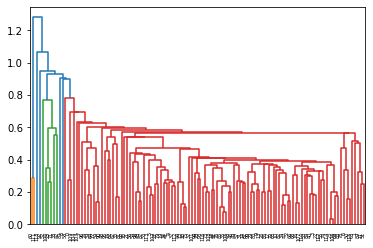

In [74]:
dendrogram(merging)
plt.show()

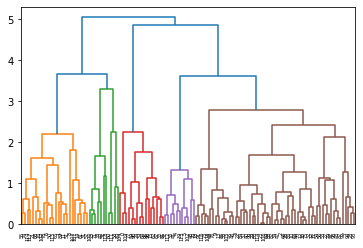

In [75]:
merging=linkage(dat_pca3_1,method="complete",metric="euclidean")
dendrogram(merging)
plt.show()

In [76]:
cut_tree(merging,n_clusters=5).shape

(119, 1)

In [77]:
clustercut=pd.Series(cut_tree(merging,n_clusters=5).reshape(-1,))

In [78]:
dat_pca3

,country,pc1,pc2,pc3
0,Afghanistan,-2.635575,1.472267,-0.549489
1,Algeria,-0.459557,-0.675495,0.959355
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430
3,Armenia,-0.334555,-1.271889,0.190564
4,Australia,3.181525,-0.262485,-0.130870
...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829
115,Uzbekistan,-1.031922,-0.561378,0.763442
116,Vanuatu,-1.175210,-0.275652,-0.667131
117,Vietnam,-0.594449,-1.076335,0.528875


In [79]:
dat_pca3_hc=pd.concat([dat_pca3,clustercut],axis=1)
dat_pca3_hc

,country,pc1,pc2,pc3,0
0,Afghanistan,-2.635575,1.472267,-0.549489,0
1,Algeria,-0.459557,-0.675495,0.959355,1
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,2
3,Armenia,-0.334555,-1.271889,0.190564,2
4,Australia,3.181525,-0.262485,-0.130870,3
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,2
115,Uzbekistan,-1.031922,-0.561378,0.763442,1
116,Vanuatu,-1.175210,-0.275652,-0.667131,2
117,Vietnam,-0.594449,-1.076335,0.528875,1


In [80]:
dat_pca3_hc.columns=["country","pc1","pc2","pc3","ClusterID"]
dat_pca3_hc

,country,pc1,pc2,pc3,ClusterID
0,Afghanistan,-2.635575,1.472267,-0.549489,0
1,Algeria,-0.459557,-0.675495,0.959355,1
2,Antigua and Barbuda,0.648597,-1.023437,-0.257430,2
3,Armenia,-0.334555,-1.271889,0.190564,2
4,Australia,3.181525,-0.262485,-0.130870,3
...,...,...,...,...,...
114,Uruguay,0.454814,-1.098889,0.045829,2
115,Uzbekistan,-1.031922,-0.561378,0.763442,1
116,Vanuatu,-1.175210,-0.275652,-0.667131,2
117,Vietnam,-0.594449,-1.076335,0.528875,1


In [81]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [82]:
dat7=pd.merge(country,dat_pca3_hc,on="country")

In [83]:
dat7

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pc1,pc2,pc3,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.635575,1.472267,-0.549489,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459557,-0.675495,0.959355,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.648597,-1.023437,-0.257430,2
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.334555,-1.271889,0.190564,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.181525,-0.262485,-0.130870,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,0.454814,-1.098889,0.045829,2
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,-1.031922,-0.561378,0.763442,1
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,-1.175210,-0.275652,-0.667131,2
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,-0.594449,-1.076335,0.528875,1


In [84]:
dat8=dat7.drop(["pc1","pc2","pc3"],axis=1)
dat8

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3
...,...,...,...,...,...,...,...,...,...,...,...
114,Uruguay,10.6,3129.70,993.6500,3022.600,17100,4.91,76.4,2.08,11900,2
115,Uzbekistan,36.3,437.46,80.1780,393.300,4240,16.50,68.8,2.34,1380,1
116,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,2
117,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1


In [86]:
dat8["ClusterID"].value_counts()

2    57
1    24
0    16
4    11
3    11
Name: ClusterID, dtype: int64

In [87]:
dat8[dat8["ClusterID"]==0]["country"].unique()

array(['Afghanistan', 'Botswana', 'Comoros', 'Eritrea', 'Gambia', 'Kenya',
       'Lao', 'Liberia', 'Madagascar', 'Namibia', 'Pakistan', 'Rwanda',
       'Solomon Islands', 'South Africa', 'Tanzania', 'Uganda'],
      dtype=object)

In [89]:
dat8[dat8["ClusterID"]==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,45.9325,324.912,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,50.9580,562.020,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,2480.8200,351.8820,3150.330,8460,3.56,58.6,3.60,5190,0


In [90]:
dat8[dat8["ClusterID"]==1]["country"].unique()

array(['Algeria', 'Azerbaijan', 'Bahrain', 'Belarus', 'Bolivia', 'Brazil',
       'Chile', 'Egypt', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kyrgyz Republic', 'Libya', 'Malaysia', 'Moldova', 'Nepal',
       'Russia', 'Suriname', 'Tajikistan', 'Turkey', 'Ukraine',
       'Uzbekistan', 'Vietnam'], dtype=object)

In [91]:
dat8[dat8["ClusterID"]==2]["country"].unique()

array(['Antigua and Barbuda', 'Armenia', 'Bahamas', 'Bangladesh',
       'Barbados', 'Belize', 'Bhutan', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Estonia', 'Fiji', 'Georgia', 'Greece', 'Grenada', 'Guatemala',
       'Guyana', 'Hungary', 'India', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Morocco', 'Myanmar', 'New Zealand', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Samoa',
       'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea',
       'Spain', 'St. Vincent and the Grenadines', 'Tonga', 'Tunisia',
       'Turkmenistan', 'Uruguay', 'Vanuatu'], dtype=object)

In [92]:
dat8[dat8["ClusterID"]==3]["country"].unique()

array(['Australia', 'Austria', 'Canada', 'Finland', 'France', 'Germany',
       'Iceland', 'Malta', 'Sweden', 'United Kingdom', 'United States'],
      dtype=object)

In [93]:
dat8[dat8["ClusterID"]==4]["country"].unique()

array(['Congo, Rep.', 'Gabon', 'Ghana', 'Iraq', 'Kazakhstan', 'Kuwait',
       'Mauritania', 'Oman', 'Sudan', 'United Arab Emirates', 'Yemen'],
      dtype=object)

In [94]:
dat8[dat8["ClusterID"]==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,14386.5000,1028.7900,10536.300,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,3099.4200,338.2830,3889.350,16200,15.10,70.4,1.49,6030,1
14,Bolivia,46.6,815.7600,95.8320,679.140,5410,8.78,71.6,3.20,1980,1
16,Brazil,19.8,1198.4000,1009.1200,1321.600,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,4863.3000,1026.8400,4037.700,19400,8.96,79.1,1.88,12900,1
31,Egypt,29.1,553.8000,121.1600,691.600,9860,10.10,70.5,3.19,2600,1
50,Indonesia,33.3,755.7300,81.1710,696.640,8430,15.30,69.9,2.48,3110,1
51,Iran,19.3,1593.3200,365.6800,1266.820,17400,15.90,74.5,1.76,6530,1


In [95]:
dat8[dat8["ClusterID"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00000,735.6600,7185.800000,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76000,141.6800,1458.660000,6700,7.770,73.3,1.69,3220,2
7,Bahamas,13.8,9800.00000,2209.2000,12236.000000,22900,-0.393,73.8,1.86,28000,2
9,Bangladesh,49.4,121.28000,26.6816,165.244000,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,6320.00000,1275.2000,7792.000000,15300,0.321,76.7,1.78,16000,2
12,Belize,18.8,2525.88000,225.6800,2495.500000,7880,1.140,71.4,2.71,4340,2
13,Bhutan,42.7,926.50000,113.3600,1541.260000,6420,5.990,72.1,2.38,2180,2
17,Bulgaria,10.8,3433.68000,469.9080,3625.200000,15300,1.110,73.9,1.57,6840,2
18,Cambodia,44.4,425.22600,44.6448,467.670000,2520,3.120,66.1,2.88,786,2
20,Cape Verde,26.5,1082.37000,135.3790,2045.580000,5830,0.505,72.5,2.67,3310,2


In [96]:
dat8[dat8["ClusterID"]==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
4,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,3
5,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,3
19,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,3
36,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,3
37,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,3
41,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,3
48,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,3
70,Malta,6.8,32283.0,1825.15,32494.0,28300,3.830,80.3,1.36,21100,3
102,Sweden,3.0,24070.2,5017.23,21204.7,42900,0.991,81.5,1.98,52100,3
112,United Kingdom,5.2,10969.8,3749.96,11981.2,36200,1.570,80.3,1.92,38900,3


In [97]:
dat8[dat8["ClusterID"]==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,"Congo, Rep.",63.9,2331.74,67.404,1498.78,5190,20.7,60.4,4.95,2740,4
38,Gabon,63.7,5048.75,306.250,1653.75,15400,16.6,62.9,4.08,8750,4
42,Ghana,74.7,386.45,68.382,601.29,3060,16.6,62.2,4.27,1310,4
52,Iraq,36.9,1773.00,378.450,1534.50,12700,16.6,67.2,4.56,4500,4
58,Kazakhstan,21.5,4008.94,389.103,2711.93,20100,19.5,68.4,2.60,9070,4
60,Kuwait,10.8,25679.50,1012.550,11704.00,75200,11.2,78.2,2.21,38500,4
71,Mauritania,97.4,608.40,52.920,734.40,3320,18.9,68.2,4.98,1200,4
80,Oman,11.7,12680.10,534.610,7951.60,45300,15.6,76.1,2.90,19300,4
100,Sudan,76.7,291.56,93.536,254.56,3370,19.6,66.3,4.88,1480,4
111,United Arab Emirates,8.6,27195.00,1281.000,22260.00,57600,12.5,76.5,1.87,35000,4
